# РГР. Казаков А.Ю. (КТ-43-21)

# **Задание 1.** Кластерный анализ данных. Иерархическая кластеризация.

#### Загрузка данных

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("artificial_15.csv", sep=",")
df.head()

Unnamed: 0  Признак_1  Признак_2  Признак_3  Признак_4  Признак_5  \
0           0  -3.955976   5.188271   6.062905   7.774490   5.943820   
1           1  -4.100995   5.416164   5.684489   7.102338   5.804283   
2           2  -5.547473   4.855806   7.007865   6.017787   5.354479   
3           3   3.511484   8.038911   8.003863   6.092089  -9.626183   
4           4   2.919123   9.307419   7.419447   7.437374 -10.674405   

   Признак_6  Признак_7  Признак_8  Признак_9  Признак_10  
0  -8.865464  -7.410245   5.485560  -3.981683   -6.060345  
1 -10.315420  -6.659373   5.991921  -4.399371   -4.448103  
2 -12.404601 -10.040228   5.496482  -5.694639   -7.180212  
3   4.168714  -3.287864   1.042670   2.847386   -7.364178  
4   3.553902  -2.169116   0.567019   2.622001   -8.046441

#### Предобработка данных.

Удалим столбец "Unnamed: 0" (столбец с номером строки), т.к. он не имеет отношения к кластиризации и будет мешать при работа с данными.

In [3]:
del df['Unnamed: 0']

Требуется стандартизировать значения в столбецах, чтобы небыло большого расстояния между объектами, потому что сейчас большое "расстояние" между -12 до 6. Лучше стандартизировать, чтобы дендаграмма выглядела более аккуратно и понятно для подсчёта оптимального количества кластеров.

In [4]:
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)
X.head()

Признак_1  Признак_2  Признак_3  Признак_4  Признак_5  Признак_6  \
0  -0.775749  -0.505493  -0.514167   0.978276   1.053034  -0.923882   
1  -0.819208  -0.391468  -0.776964   0.364317   1.034229  -1.141539   
2  -1.252687  -0.671841   0.142076  -0.626336   0.973609  -1.455153   
3   1.462095   0.920815   0.833763  -0.558467  -1.045320   1.032718   
4   1.284577   1.555509   0.427906   0.670346  -1.186588   0.940426   

   Признак_7  Признак_8  Признак_9  Признак_10  
0  -0.863283   1.100846  -0.682518   -0.478037  
1  -0.589994   1.299683  -0.780553    0.873844  
2  -1.820498   1.105135  -1.084564   -1.417056  
3   0.637109  -0.643778   0.920325   -1.571314  
4   1.044292  -0.830556   0.867425   -2.143398

#### **Метод №1.** Применение иерархической кластиризации. Построение дендаграммы.

Применим алгоритм иерархической кластеризации и построим дендрограмму для визуального подсчёта кол-ва кластеров. Вычисления производятся функцией linkage.

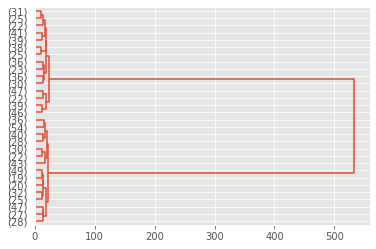

In [5]:
# link - это объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link,
                labels=X.index.tolist(),
                truncate_mode='lastp',
                color_threshold=5,
                orientation = "right",
                leaf_rotation=0.)

Из дендограммы видно, что оптимальное количество кластеров == 4.

Создадим в таблице столбец "cluster" и присвоим номер класстера.

In [7]:
X['cluster'] = fcluster(link, 4, criterion='maxclust')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением группирующей функции.

In [8]:
X.groupby('cluster').mean()

Признак_1  Признак_2  Признак_3  Признак_4  Признак_5  Признак_6  \
cluster                                                                     
1        -0.963471  -0.840444  -0.505099   0.790013   1.015532  -0.977787   
2        -0.946269  -0.901210  -0.924000  -0.138954   0.966678  -0.998031   
3         0.952680   1.142508   0.642687  -0.461001  -0.991851   1.048617   
4         0.955695   0.750432   0.750166  -0.257178  -0.990350   0.961064   

         Признак_7  Признак_8  Признак_9  Признак_10  
cluster                                               
1        -0.905263   0.810798  -0.943648    0.472713  
2        -0.975036   1.028070  -0.997040    0.645810  
3         0.849905  -1.075611   1.082038   -0.986647  
4         0.980921  -0.851806   0.921093   -0.370539

Также интересно узнать, сколько наблюдений попало в каждый кластер. Для этого также применяем вызов ```groupy``` с последующим применением метода ```size```.

In [9]:
X.groupby('cluster').size()

cluster
1    247
2    253
3    154
4    346
dtype: int64

#### **Метод №2.** K-means

In [24]:
df = pd.read_csv("artificial_15.csv", sep=",")
del df['Unnamed: 0']
df.head()

Признак_1  Признак_2  Признак_3  Признак_4  Признак_5  Признак_6  \
0  -3.955976   5.188271   6.062905   7.774490   5.943820  -8.865464   
1  -4.100995   5.416164   5.684489   7.102338   5.804283 -10.315420   
2  -5.547473   4.855806   7.007865   6.017787   5.354479 -12.404601   
3   3.511484   8.038911   8.003863   6.092089  -9.626183   4.168714   
4   2.919123   9.307419   7.419447   7.437374 -10.674405   3.553902   

   Признак_7  Признак_8  Признак_9  Признак_10  
0  -7.410245   5.485560  -3.981683   -6.060345  
1  -6.659373   5.991921  -4.399371   -4.448103  
2 -10.040228   5.496482  -5.694639   -7.180212  
3  -3.287864   1.042670   2.847386   -7.364178  
4  -2.169116   0.567019   2.622001   -8.046441

Стандартизируем данные в таблице.

In [25]:
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)
X.head()

Признак_1  Признак_2  Признак_3  Признак_4  Признак_5  Признак_6  \
0  -0.775749  -0.505493  -0.514167   0.978276   1.053034  -0.923882   
1  -0.819208  -0.391468  -0.776964   0.364317   1.034229  -1.141539   
2  -1.252687  -0.671841   0.142076  -0.626336   0.973609  -1.455153   
3   1.462095   0.920815   0.833763  -0.558467  -1.045320   1.032718   
4   1.284577   1.555509   0.427906   0.670346  -1.186588   0.940426   

   Признак_7  Признак_8  Признак_9  Признак_10  
0  -0.863283   1.100846  -0.682518   -0.478037  
1  -0.589994   1.299683  -0.780553    0.873844  
2  -1.820498   1.105135  -1.084564   -1.417056  
3   0.637109  -0.643778   0.920325   -1.571314  
4   1.044292  -0.830556   0.867425   -2.143398

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 4. 

In [27]:
model = KMeans(n_clusters=4, random_state=42)

Подгоняем модель по данным из X

In [28]:
# подгонка модели по данным из X
model.fit(X)

KMeans(n_clusters=4, random_state=42)

Отобразим метки для каждой точки с помощью метода labels_

In [15]:
model.labels_

array([3, 3, 1, 0, 2, 2, 3, 2, 0, 2, 1, 1, 3, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       0, 0, 3, 2, 2, 1, 2, 1, 3, 1, 2, 1, 0, 3, 1, 2, 1, 0, 2, 3, 2, 3,
       1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 2, 0, 3, 0, 3, 0, 0,
       3, 3, 2, 1, 1, 1, 0, 0, 3, 2, 3, 1, 1, 2, 3, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 3, 3, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2,
       2, 1, 2, 1, 3, 3, 3, 1, 3, 2, 0, 3, 1, 2, 1, 0, 3, 0, 0, 2, 0, 3,
       2, 1, 2, 3, 2, 2, 2, 3, 1, 3, 3, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1,
       2, 2, 2, 3, 2, 2, 3, 3, 0, 1, 1, 1, 1, 2, 2, 0, 3, 1, 3, 1, 1, 3,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 3, 2, 3, 1, 2, 2, 1,
       0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 3, 3, 2, 2, 0, 2,
       1, 2, 0, 3, 1, 2, 3, 1, 0, 2, 0, 3, 2, 1, 0, 0, 0, 0, 3, 0, 1, 0,
       3, 1, 3, 0, 1, 1, 0, 1, 0, 1, 0, 3, 2, 2, 1, 1, 1, 1, 2, 1, 0, 3,
       2, 3, 3, 0, 0, 1, 1, 3, 1, 1, 0, 2, 3, 2, 0, 0, 2, 0, 3, 3, 3, 1,
       1, 0, 0, 2, 2, 1, 2, 3, 2, 2, 3, 3, 1, 2, 1,

Отобразим координаты кластеров.

In [16]:
model.cluster_centers_

array([[ 0.94351663,  0.91501935,  0.83035012, -1.19963702, -0.99564116,
         0.9822146 ,  0.91774783, -0.85664164,  0.98828825, -0.44114767],
       [-0.98733921, -0.84511246, -0.69391306, -0.37535529,  0.99261656,
        -0.98936317, -0.929547  ,  0.91731625, -0.9696592 ,  0.45787664],
       [ 0.96325337,  0.83812899,  0.6316003 ,  0.34366373, -0.9871687 ,
         0.99241813,  0.9577834 , -0.96909064,  0.95736888, -0.65018777],
       [-0.91744084, -0.90107681, -0.74359044,  1.11672814,  0.98874382,
        -0.9865036 , -0.95319743,  0.92465814, -0.97181587,  0.67767039]])

In [31]:
#new_items = [
#   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#]
#model.predict(new_items)

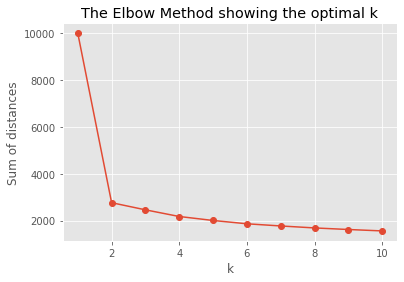

In [30]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Из графика видно что оптимальное кол-во класстеров == 4

In [53]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)
X['cluster'] = model.labels_
X.groupby('cluster').mean()

IndexError: ignored

In [ ]:
X.groupby('cluster').size()

# **Задание 2.** Задача класификации.

#### Загрузка данных.

In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [40]:
df = pd.read_csv("weatherAUS.csv", sep=",")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

#### Подготовка данных.

In [41]:
# Удалим не информативные столбца "Evaporation", "Sunshine"
del df["Evaporation"]
del df["Sunshine"]
del df["Date"]
del df["Location"]
del df["WindGustDir"]
del df["WindDir9am"]
del df["WindDir3pm"]

Посмотрим - сколько пропущенных значений в каждой колонке.

In [42]:
df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Заменим значение No и Yes в колонках **RainToday** и **RainTomorrow** на 0 и 1 для верного нахождения Knn.

In [43]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1}).fillna(df['RainToday']) 
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}).fillna(df['RainTomorrow'])
df['RainToday'] = np.where(df['RainToday'].isnull(), 0, df.RainToday)
df['RainTomorrow'] = np.where(df['RainTomorrow'].isnull(), 0, df.RainTomorrow)
#df['GoingRain'] = (df['RainTomorrow'] + df['RainToday'])
#df['GoingRain'] = np.where(df['GoingRain'] > 0, 1, 0)

#df[["RainToday", "RainTomorrow"]] = df[["RainToday", "RainTomorrow"]].astype(int)

Заменим отсутствие (NaN) значения во всех вышеперечисленных колонках на 0.

In [44]:
df['MinTemp'] = np.where(df['MinTemp'].isnull(), 0, df.MinTemp)
df['MaxTemp'] = np.where(df['MaxTemp'].isnull(), 0, df.MaxTemp)
df['Rainfall'] = np.where(df['Rainfall'].isnull(), 0, df.Rainfall)
df['WindGustSpeed'] = np.where(df['WindGustSpeed'].isnull(), 0, df.WindGustSpeed)
df['WindSpeed9am'] = np.where(df['WindSpeed9am'].isnull(), 0, df.WindSpeed9am)
df['WindSpeed3pm'] = np.where(df['WindSpeed3pm'].isnull(), 0, df.WindSpeed3pm)
df['Humidity9am'] = np.where(df['Humidity9am'].isnull(), 0, df.Humidity9am)
df['Pressure9am'] = np.where(df['Pressure9am'].isnull(), 0, df.Pressure9am)
df['Pressure3pm'] = np.where(df['Pressure3pm'].isnull(), 0, df.Pressure3pm)
df['Humidity3pm'] = np.where(df['Humidity3pm'].isnull(), 0, df.Humidity3pm)
df['Humidity3pm'] = np.where(df['Humidity3pm'].isnull(), 0, df.Humidity3pm)
df['Humidity3pm'] = np.where(df['Humidity3pm'].isnull(), 0, df.Humidity3pm)
df['Cloud9am'] = np.where(df['Cloud9am'].isnull(), 0, df.Cloud9am)
df['Cloud3pm'] = np.where(df['Cloud3pm'].isnull(), 0, df.Cloud3pm)
df['Temp9am'] = np.where(df['Temp9am'].isnull(), 0, df.Temp9am)
df['Temp3pm'] = np.where(df['Temp3pm'].isnull(), 0, df.Temp3pm)
df['RainToday'] = np.where(df['RainToday'].isnull(), 0, df.RainToday)
df['RainTomorrow'] = np.where(df['RainTomorrow'].isnull(), 0, df.RainTomorrow)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  float64
 4   WindSpeed9am   145460 non-null  float64
 5   WindSpeed3pm   145460 non-null  float64
 6   Humidity9am    145460 non-null  float64
 7   Humidity3pm    145460 non-null  float64
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Cloud9am       145460 non-null  float64
 11  Cloud3pm       145460 non-null  float64
 12  Temp9am        145460 non-null  float64
 13  Temp3pm        145460 non-null  float64
 14  RainToday      145460 non-null  float64
 15  RainTomorrow   145460 non-null  float64
dtypes: float64(16)
memory usage: 17.8 MB


Подсчет значений - это хороший способ понять, сколько единиц каждой характеристики / переменной.

In [ ]:
#df['GoingRain'].value_counts()

0    96300
1    49160
Name: GoingRain, dtype: int64

In [45]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Подготовка данных для подачи в модель

In [46]:
X = df.iloc[:, :-2].values  
y = df.iloc[:, 14].values  

In [47]:
X[:2, :]

array([[1.3400e+01, 2.2900e+01, 6.0000e-01, 4.4000e+01, 2.0000e+01,
        2.4000e+01, 7.1000e+01, 2.2000e+01, 1.0077e+03, 1.0071e+03,
        8.0000e+00, 0.0000e+00, 1.6900e+01, 2.1800e+01],
       [7.4000e+00, 2.5100e+01, 0.0000e+00, 4.4000e+01, 4.0000e+00,
        2.2000e+01, 4.4000e+01, 2.5000e+01, 1.0106e+03, 1.0078e+03,
        0.0000e+00, 0.0000e+00, 1.7200e+01, 2.4300e+01]])

In [48]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
#разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train.shape, X_test.shape

((97458, 14), (48002, 14))

In [50]:
# Нормирование данных
scaler = StandardScaler()  
#scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test) 

#### Создание классификатора

In [51]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_2, y_train)  

KNeighborsClassifier()

In [52]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  

In [ ]:
display(y_test, y_pred_test)

array([0., 1., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_test, y_pred_test)

0.909816257655931

#### Подбирание k, считаем число ошибок при каждом К

In [ ]:
error_rate = [-9999]*40
for i in range(1,41):
  knn_res = KNeighborsClassifier(n_neighbors=i)
  knn_res.fit(X_train_2, y_train)
  pred_i = knn_res.predict(X_test_2)
  error_rate[i-1] = np.mean(pred_i != y_test)

#### Измерение на сколько хороша модель

In [ ]:
conf_mat = accuracy_score(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_train

0.0       1.0
0.0  0.933551  0.933551
1.0  0.933551  0.933551

In [ ]:
accuracy_score(y_train, y_pred_train, normalize=True)

0.9335508629358288

#### Измерение на сколько хороша модель на тестовой выборке

In [ ]:
conf_mat = accuracy_score(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_test

0.0       1.0
0.0  0.909816  0.909816
1.0  0.909816  0.909816

In [ ]:
accuracy_score(y_test, y_pred_test, normalize=True)

0.909816257655931

In [ ]:
np.round_(error_rate, 2)

array([0.11, 0.1 , 0.09, 0.1 , 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
       0.09, 0.09, 0.09, 0.09, 0.1 , 0.09, 0.1 , 0.09, 0.1 , 0.09, 0.1 ,
       0.09, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ])

In [ ]:
[ '%.2f' % elem for elem in error_rate ]

['0.11',
 '0.10',
 '0.09',
 '0.10',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.09',
 '0.10',
 '0.09',
 '0.10',
 '0.09',
 '0.10',
 '0.09',
 '0.10',
 '0.09',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10']

Text(0, 0.5, 'Mean Error')

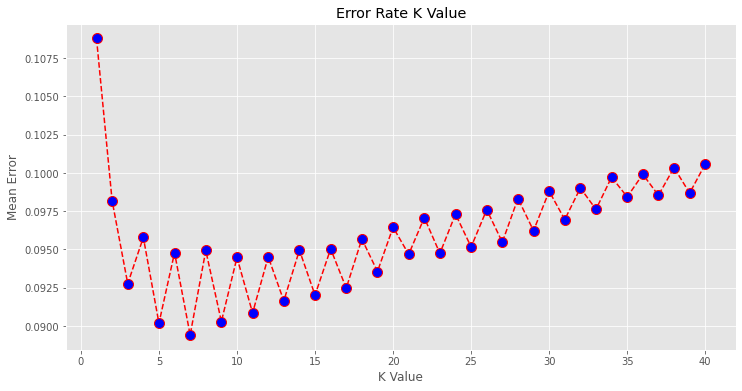

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,41), error_rate, color='red', linestyle="dashed", marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Наименьшее число ошибок при k = 7.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_2, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
def make_errors():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)  
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train_2 = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test) 
    
    error = []
    for i in range(1,41):  
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train_2, y_train)
        pred_i = knn.predict(X_test_2)
        error.append(np.mean(pred_i != y_test))
    return error

In [ ]:
errors = [] for i in range(10): error = make_errors() errors.append(error) error = pd.DataFrame(errors).mean().values

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(error)+1), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10) plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Задание 3. Задача регрессии.

Импорт библиотек.

In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

#### Загрузка данных.

In [58]:
df = pd.read_csv("LinRegr_15.csv", sep=",")
df.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0  1.150337  0.060171 -0.585120  0.353975 -0.077975  0.924968   
1           1  0.957187 -1.614714 -0.676751  0.173835  1.060224 -0.182198   
2           2  0.773648  0.723875 -0.616846  0.774110  0.062437  0.032997   
3           3 -1.372574 -1.034003  0.639447 -0.977891 -1.657063  0.734684   
4           4 -0.688709 -0.177858 -0.597723 -1.216735  0.133526  0.838117   

          6         7         8           Y  
0 -1.063031  1.064993  0.499018   54.933749  
1 -0.068978 -0.691091 -0.971354 -137.359260  
2  0.832009 -1.167025  1.000568  134.980557  
3 -1.287063  0.728523  1.240823  -52.508283  
4 -1.178599  1.641426  0.731159  -90.783648

Удалим столбец "Unnamed: 0" (столбец с номером строки), т.к. он не имеет отношения r данным.

In [59]:
df = df.drop(df.columns[[0]], axis=1)

#### Предобработка данных.


In [60]:
df.head(3)

0         1         2         3         4         5         6  \
0  1.150337  0.060171 -0.585120  0.353975 -0.077975  0.924968 -1.063031   
1  0.957187 -1.614714 -0.676751  0.173835  1.060224 -0.182198 -0.068978   
2  0.773648  0.723875 -0.616846  0.774110  0.062437  0.032997  0.832009   

          7         8           Y  
0  1.064993  0.499018   54.933749  
1 -0.691091 -0.971354 -137.359260  
2 -1.167025  1.000568  134.980557

#### Подготовка данных для подачи в модель

Требуется стандартизировать значения в столбецах, чтобы небыло большого расстояния между объектами, потому что сейчас большое "расстояние" между -137 до 1. Лучше стандартизировать, чтобы дендаграмма выглядела более аккуратно и понятно для подсчёта оптимального количества кластеров.

In [63]:
norm = preprocessing.StandardScaler()
norm.fit(df)
T = norm.transform(df)
T = pd.DataFrame(X, index=df.index, columns=df.columns)
T.head()

0         1         2         3         4         5         6  \
0  1.113075  0.066803 -0.584725  0.311851 -0.053899  0.888856 -1.133563   
1  0.925331 -1.551281 -0.676744  0.129904  1.068732 -0.225616 -0.113476   
2  0.746927  0.707999 -0.616585  0.736201  0.084592 -0.009001  0.811106   
3 -1.339236 -0.990263  0.645014 -1.033377 -1.611388  0.697316 -1.363463   
4 -0.674508 -0.163153 -0.597382 -1.274617  0.154709  0.801432 -1.252158   

          7         8         Y  
0  1.064393  0.477374  0.308762  
1 -0.686041 -0.982795 -0.955442  
2 -1.160444  0.975443  0.835018  
3  0.729006  1.214031 -0.397601  
4  1.638973  0.707904 -0.649237

In [67]:
# Проверка данных
X[:2, :]

array([[ 1.15033714,  0.06017082, -0.58511952,  0.35397524, -0.07797543,
         0.92496831, -1.06303068,  1.06499261,  0.49901844],
       [ 0.9571875 , -1.61471434, -0.6767513 ,  0.17383479,  1.06022397,
        -0.18219764, -0.06897761, -0.69109128, -0.97135384]])

In [68]:
y[:10]

array([  54.93374892, -137.35926005,  134.98055718,  -52.50828325,
        -90.78364826, -120.66404935, -184.66605277,   47.0865968 ,
       -107.23253194,   79.07952281])

#### Разделение на обучающую и тестовую выборку

In [70]:
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size=0.33, stratify=y, random_state=1234)

ValueError: ignored

#### Стандартизация предиктов

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

#### Определение числа ближайших соседей
Число ближайших соседей меняем от 1 до 40.
Каждый раз считаем accyracy (долю правильный распознований)

In [ ]:
error_rate = [-9999]*40
for i in range(1,41):
  knn_res = KNeighborsClassifier(n_neighbors=i)
  knn_res.fit(X_train_2, y_train)
  pred_i = knn_res.predict(X_test_2)
  error_rate[i-1] = np.mean(pred_i != y_test)

In [ ]:
# Посмотрим на долю ошибок при разных к
np.round_(error_rate, 2)

array([0.16, 0.2 , 0.12, 0.12, 0.11, 0.13, 0.12, 0.12, 0.12, 0.13, 0.11,
       0.12, 0.1 , 0.12, 0.1 , 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.11, 0.1 , 0.09, 0.1 , 0.11, 0.11, 0.11, 0.11, 0.12, 0.11, 0.1 ,
       0.12, 0.1 , 0.1 , 0.09, 0.08, 0.08, 0.08])

In [ ]:
[ '%.2f' % elem for elem in error_rate ]

['0.16',
 '0.20',
 '0.12',
 '0.12',
 '0.11',
 '0.13',
 '0.12',
 '0.12',
 '0.12',
 '0.13',
 '0.11',
 '0.12',
 '0.10',
 '0.12',
 '0.10',
 '0.11',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.10',
 '0.11',
 '0.10',
 '0.09',
 '0.10',
 '0.11',
 '0.11',
 '0.11',
 '0.11',
 '0.12',
 '0.11',
 '0.10',
 '0.12',
 '0.10',
 '0.10',
 '0.09',
 '0.09',
 '0.09',
 '0.09']

#### Создание графика k ближайших соседей

Text(0, 0.5, 'Mean Error')

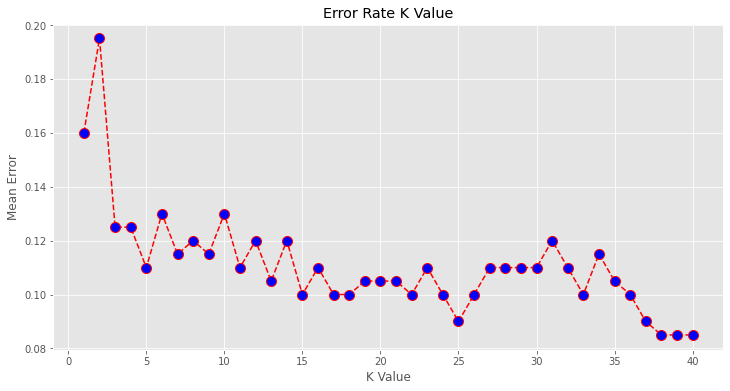

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,41), error_rate, color='red', linestyle="dashed", marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Из графика видно, что k ближайших соседей = 38.

#### Построение классификатора, где k = 38.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=38)  
classifier.fit(X_train_2, y_train) 

KNeighborsClassifier(n_neighbors=38)

In [ ]:
# Пример предсказания
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  

In [ ]:
# Измеряем на сколько хороша модель
conf_mat = accuracy_score(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_train

0        1
0  0.92625  0.92625
1  0.92625  0.92625

In [ ]:
accuracy_score(y_train, y_pred_train, normalize=True)

0.92625